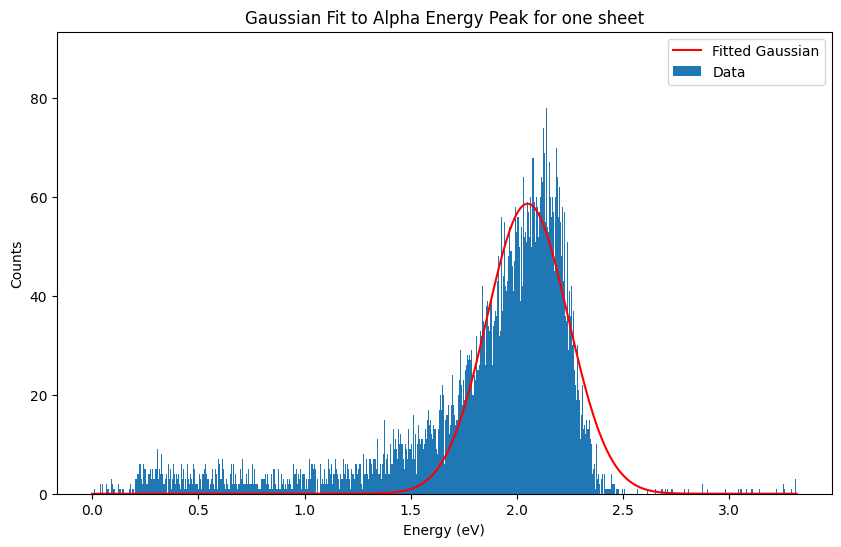

Fitted parameters for one sheet: A = 58.662716999996185, sigma = 0.19151803452082963, mu = 2.050624650603661


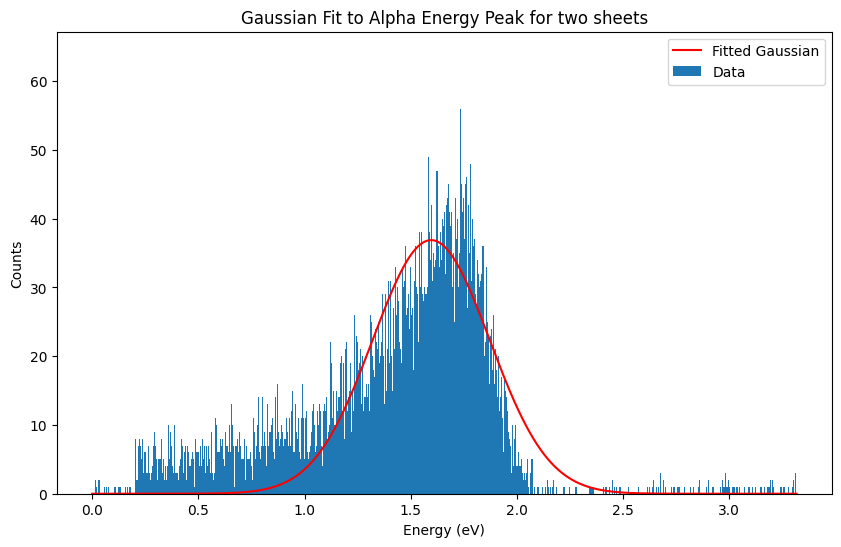

Fitted parameters for two sheets: A = 36.89084147964367, sigma = 0.2754930586143809, mu = 1.5964125440751895


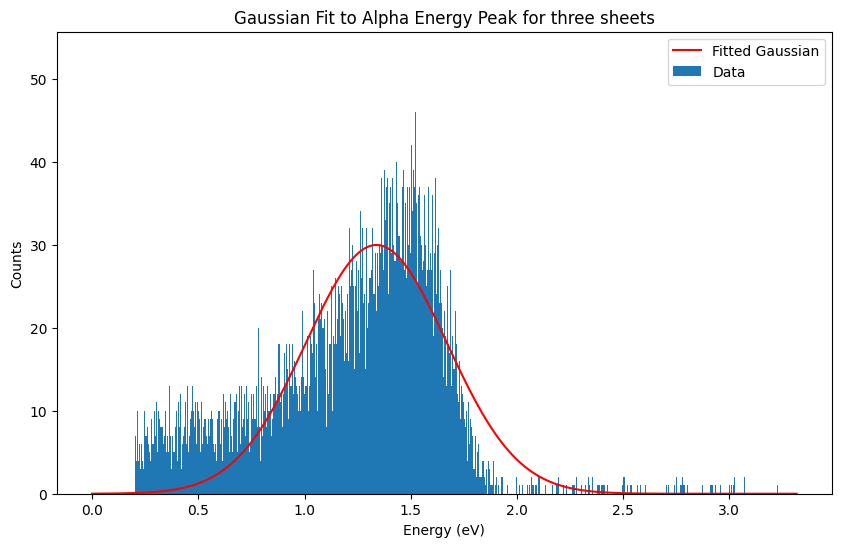

Fitted parameters for three sheets: A = 29.963681455830507, sigma = 0.33198229729473083, mu = 1.3383691257914254


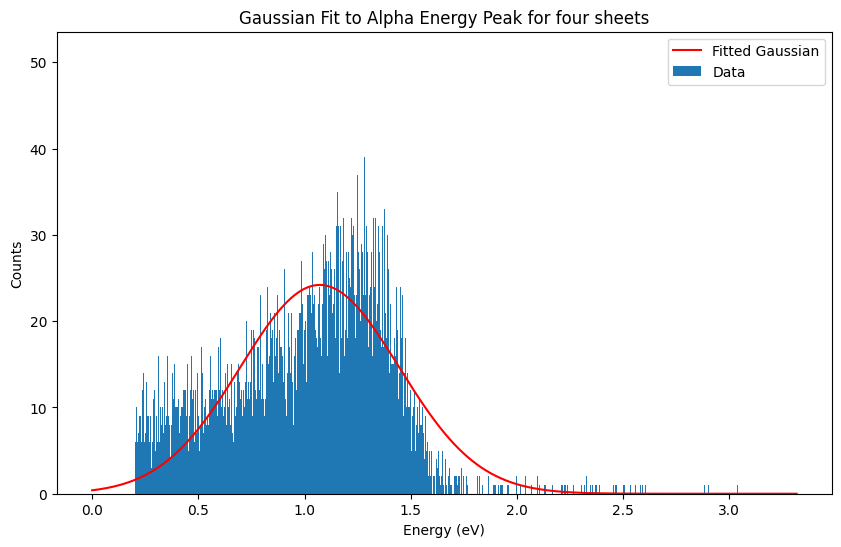

Fitted parameters for four sheets: A = 24.20387695213465, sigma = 0.37362872474885495, mu = 1.0716603010817007


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Function to read CSV file and skip the first 6 rows
def read_csv(file_path):
    return np.genfromtxt(file_path, delimiter=',', skip_header=6)

# Read each CSV file into a numpy array
one_sheet_data = read_csv('./data/mylar3.csv')     # 1 sheet
two_sheets_data = read_csv('./data/mylar2.csv')    # 2 sheets
three_sheets_data = read_csv('./data/mylar1.csv')  # 3 sheets
four_sheets_data = read_csv('./data/mylar4.csv')   # 4 sheets
eight_sheets_data = read_csv('./data/mylar6.csv')  # 8 sheets
ten_plus_sheets_data = read_csv('./data/mylar5.csv')  # 10+ sheets

# Given constants
channels = 16384
voltage = 1.15  # in Volts

# Calculate voltage per channel
voltage_per_channel = voltage / channels

# Conversion factors
G1 = 0.264  # C/J
G2 = 8.196 * 10**12  # V/C
v_to_j = (G1 * G2)**-1  # in J/V
j_to_ev = 6.242 * 10**12  # eV/J

# Function to convert channel number to energy in eV
def channel_to_ev(channel_number):
    voltage = channel_number * voltage_per_channel
    energy_joules = voltage * v_to_j
    energy_ev = energy_joules * j_to_ev
    return energy_ev

# Gaussian function
def gaussian(x, A, sigma, mu):
    return A * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Function to plot data and fit Gaussian
def data_plotter(data, name):
    channel_numbers = data[:, 0]
    counts = data[:, 1]

    # Remove NaN and inf values
    valid_indices = np.isfinite(counts)
    channel_numbers = channel_numbers[valid_indices]
    counts = counts[valid_indices]

    # Convert channel numbers to energy in eV
    energies_ev = np.array([channel_to_ev(ch) for ch in channel_numbers])

    # Initial guesses for the parameters
    initial_guess = [50, 0.075, energies_ev[np.argmax(counts)]]

    # Fit the Gaussian function to the data with bounds
    popt, pcov = curve_fit(gaussian, energies_ev, counts, p0=initial_guess)

    # Generate a finer grid of energy values for plotting the fit
    energy_grid = np.linspace(min(energies_ev), max(energies_ev), 1000)

    # Plot the data and the fitted Gaussian
    plt.figure(figsize=(10, 6))
    plt.bar(energies_ev, counts, label='Data', width=(max(energies_ev) - min(energies_ev)) / len(energies_ev))
    plt.plot(energy_grid, gaussian(energy_grid, popt[0], popt[1], popt[2]), label='Fitted Gaussian', color='red')
    plt.xlabel('Energy (eV)')
    plt.ylabel('Counts')
    plt.title(f'Gaussian Fit to Alpha Energy Peak for {name}')
    plt.legend()
    plt.show()

    # Print the fitted parameters
    print(f"Fitted parameters for {name}: A = {popt[0]}, sigma = {popt[1]}, mu = {popt[2]}")

# Plot histograms and fit Gaussian for each dataset
data_plotter(one_sheet_data, 'one sheet')
data_plotter(two_sheets_data, 'two sheets')
data_plotter(three_sheets_data, 'three sheets')
data_plotter(four_sheets_data, 'four sheets')
data_plotter(eight_sheets_data, 'eight sheets')
data_plotter(ten_plus_sheets_data, 'ten sheets')